In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

In [4]:
ruta = "C:/Users/dario/OneDrive/Escritorio/Unab/Inferencia y Patrones/Datos para Ejercicios/glakes.csv"
df = pd.read_csv(ruta)
df.head()

,Case,Tonnage,Time
0,1,2213,17
1,2,3256,30
2,3,12203,68
3,4,7021,64
4,5,529,11


In [5]:
X = df[['Tonnage']]
y = df[["Time"]]

In [6]:
modelo = linear_model.LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [9]:
modelo.predict([[1000]]) #Tiempo medio de espera 18.86

C:\Users\dario\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[18.86257671]])

¿Hay evidencia suficiente a nivel 0,01 para decir que β ̸= 0? ¿Cuanto vale el estadıstico del test
para estos datos? Indicar el p−valor. Interpretar la conclusion de este test.

RTA: Los p-valores dieron muy por debajo de 0,001 inclusive, Por ende son estadisticamente significativos

In [11]:
#Agregamos constante de intercepcion
X = sm.add_constant(X)

#Reajustamos el modelo
modelo = sm.OLS(y,X).fit()

#Vemos el resumen de valores importantes
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     150.7
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           5.22e-13
Time:                        11:20:52   Log-Likelihood:                -116.43
No. Observations:                  31   AIC:                             236.9
Df Residuals:                      29   BIC:                             239.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3447      2.643      4.671      0.0

In [12]:
#Graficar residuos contra valores predichos

valores_predichos = modelo.fittedvalues
residuos = modelo.resid

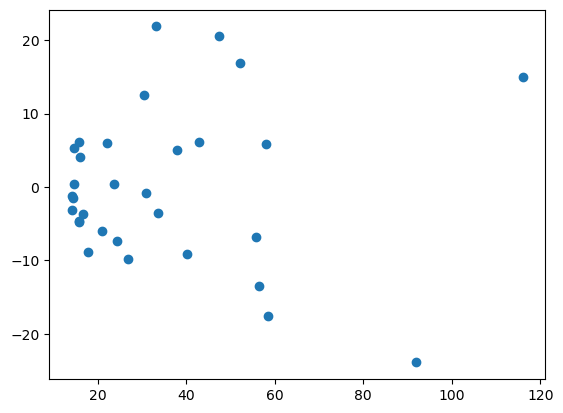

In [13]:
plt.scatter(valores_predichos, residuos)

In [ ]:
#2do modelo propuesto log(Tiempo_i ) = α + β × (Peso^0,25 )_i + εi

In [16]:
X_025 = X**0.25
X_025.head()

,const,Tonnage
0,1.0,6.858756
1,1.0,7.553898
2,1.0,10.510337
3,1.0,9.153765
4,1.0,4.795832


In [17]:
y_log = np.log(y)
y_log.head()

,Time
0,2.833213
1,3.401197
2,4.219508
3,4.158883
4,2.397895


In [18]:
modelo2 = linear_model.LinearRegression()
modelo2.fit(X_025,y_log)

LinearRegression()

In [19]:
#agregamos constantes
X_025 = sm.add_constant(X_025)
modelo2 = sm.OLS(y_log, X_025).fit()



In [20]:
residuos2 = modelo2.resid
val_pred2 = modelo2.fittedvalues

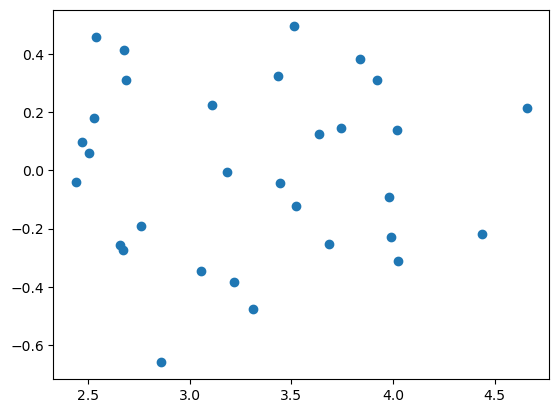

In [21]:
plt.scatter(val_pred2, residuos2)

(array([1., 1., 2., 6., 3., 3., 5., 3., 3., 4.]),
 array([-0.66065935, -0.54503499, -0.42941064, -0.31378629, -0.19816193,
        -0.08253758,  0.03308677,  0.14871113,  0.26433548,  0.37995984,
         0.49558419]),
 <BarContainer object of 10 artists>)

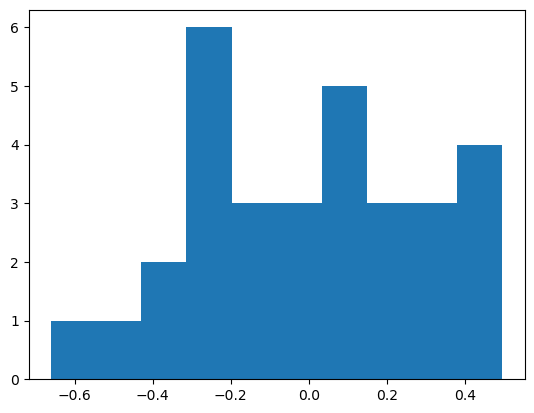

In [22]:
plt.hist(residuos2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2388d592480>,
 'caps': [<matplotlib.lines.Line2D at 0x2388e222fc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2388e2228a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2388e223590>],
 'fliers': [<matplotlib.lines.Line2D at 0x2388e223830>],
 'means': []}

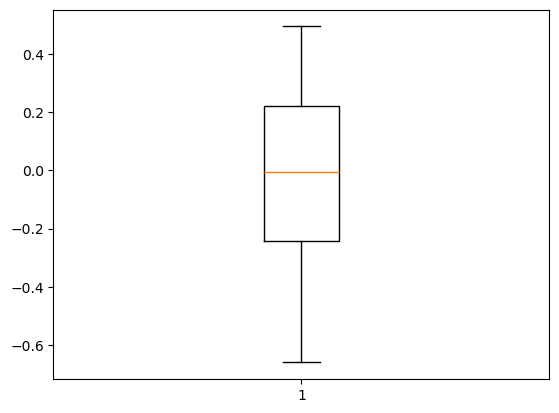

In [23]:
plt.boxplot(residuos2)